In [6]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
from time import sleep

import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import PIL.Image as Image

from dataset import *
from utilities import *
from resnet import *
from config import *

In [8]:
color_to_gray_map, gray_to_color_map = None, None

In [9]:
np.random.seed(0)
train_imageset_path = '../trainval/DAVIS/ImageSets/2017/train.txt'
val_imageset_path = '../trainval/DAVIS/ImageSets/2017/val.txt'
train_image_root = '../trainval/DAVIS/JPEGImages/480p/'
train_mask_root = '../trainval/DAVIS/Annotations/480p/'
testd_image_root = '../testd/DAVIS/JPEGImages/480p/'
testd_mask_root = '../testd/DAVIS/Annotations/480p/'
result_root = '../result/resnet/'
models_root = '../models/'

train_list = []
val_list = []

with open(train_imageset_path, 'r') as f:
    for line in f:
        train_list.append(line.strip())
with open(val_imageset_path, 'r') as f:
    for line in f:
        val_list.append(line.strip())


bear
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32764577865600586 0.9923469387755102


/tmp/ipykernel_8707/55268610.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(loss.item(), torch.sum(output_mask == torch.tensor(input[:, 3, :, :]).to(device)).item() / (224 * 224))


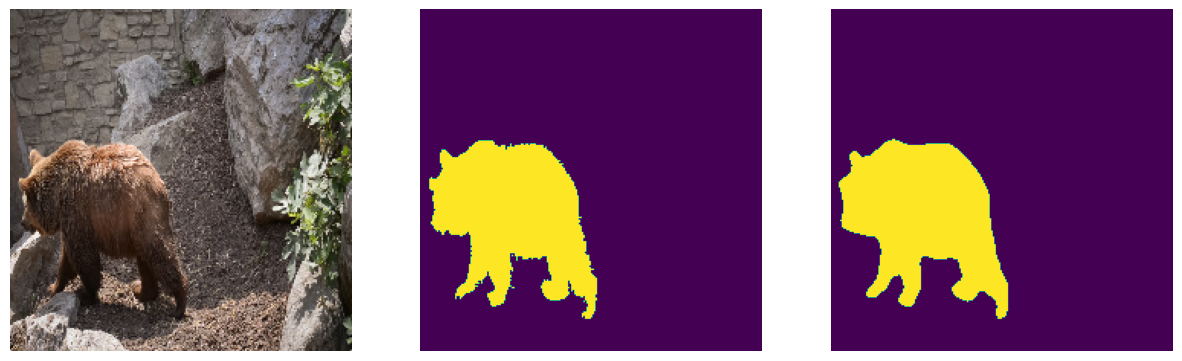

bmx-bumps
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
boat
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.33392027020454407 0.9868064413265306


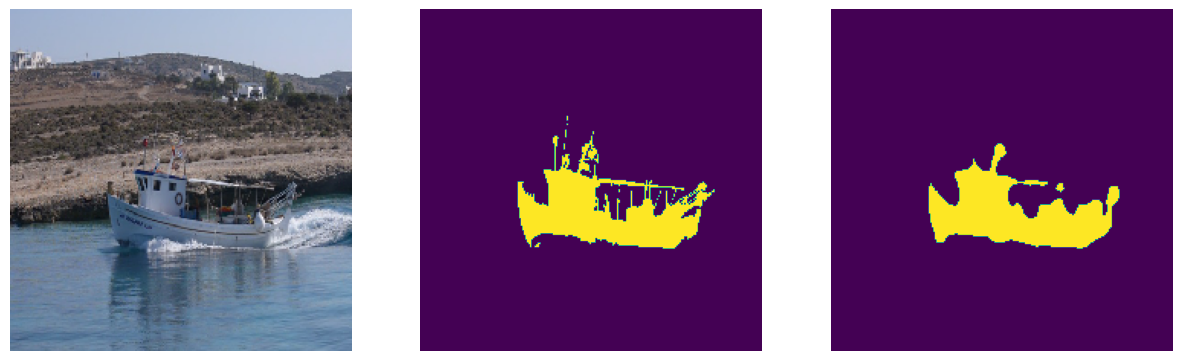

boxing-fisheye
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
breakdance-flare
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.325482577085495 0.9931042729591837


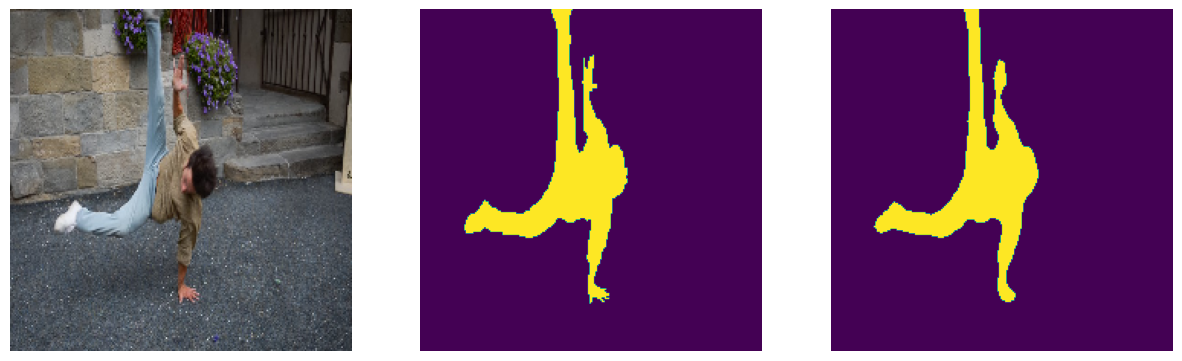

bus
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3238512873649597 0.9941007653061225


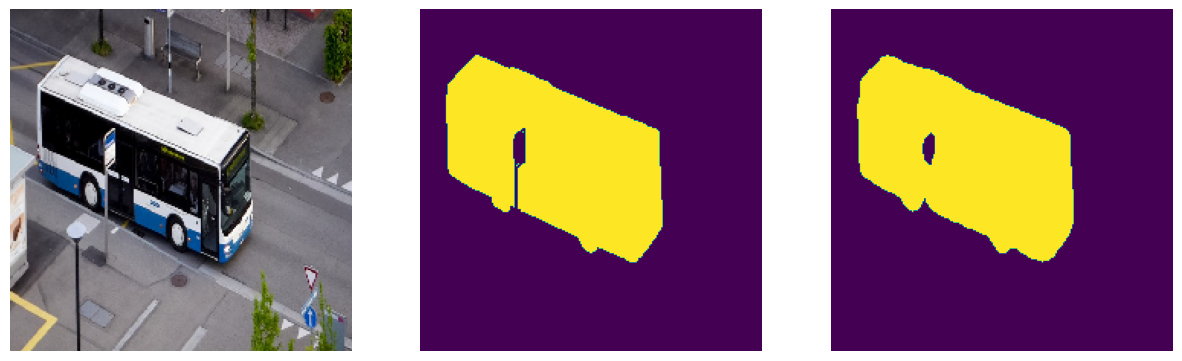

car-turn
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32245591282844543 0.9974689094387755


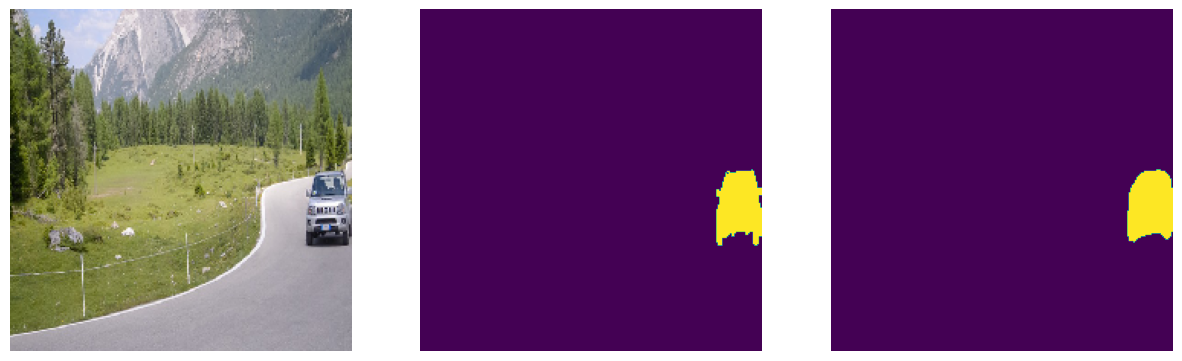

cat-girl
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
classic-car
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
color-run
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
crossing
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
dance-jump
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3250553011894226 0.9936822385204082


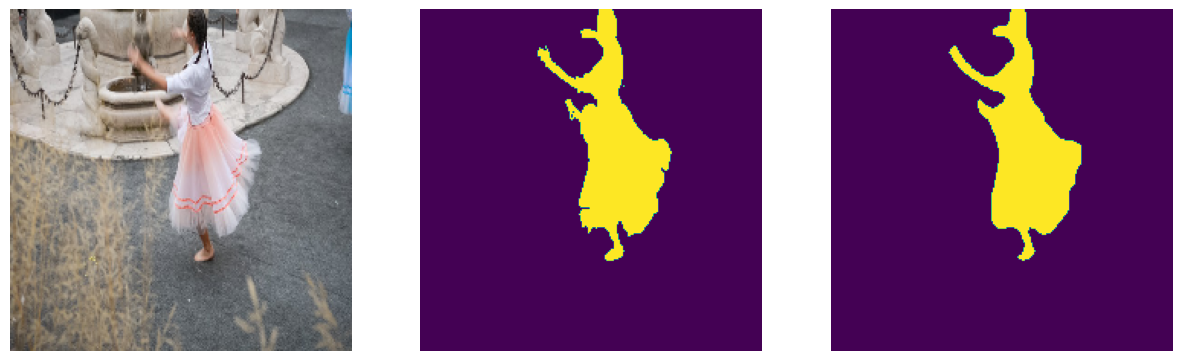

dancing
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
disc-jockey
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
dog-agility
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32825523614883423 0.9906927614795918


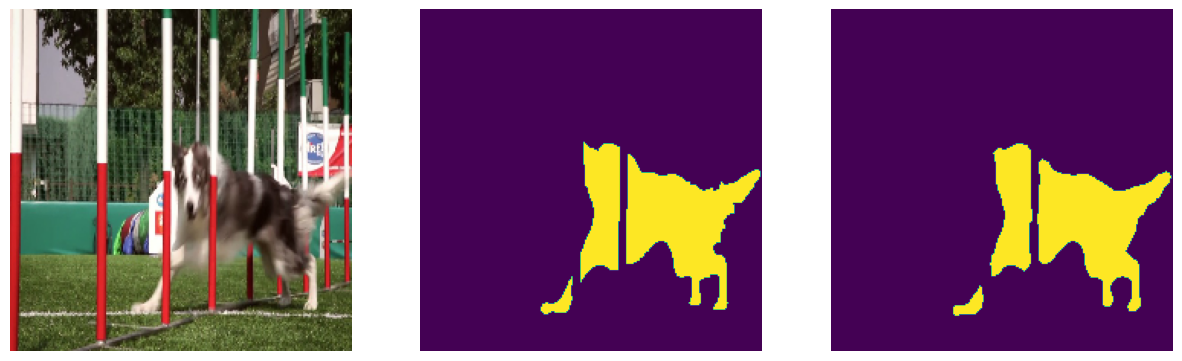

dog-gooses
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 6
dogs-scale
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 5
drift-turn
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3241331875324249 0.9980668048469388


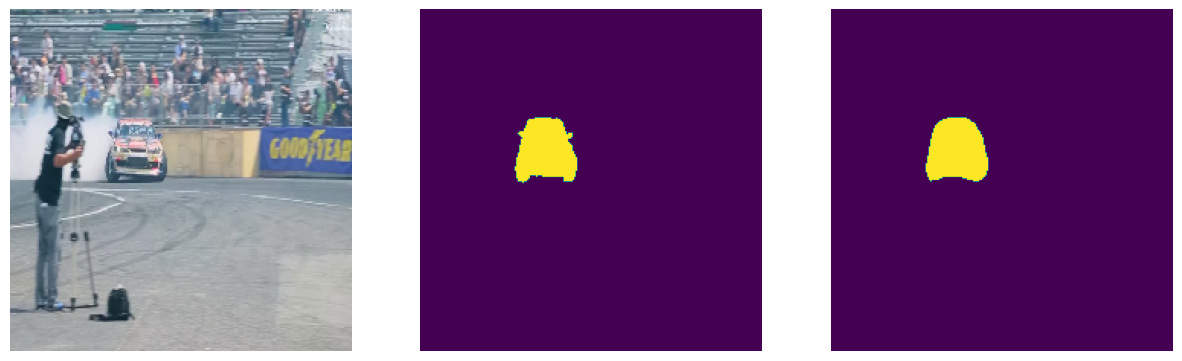

drone
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 6
elephant
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3260236978530884 0.9923867984693877


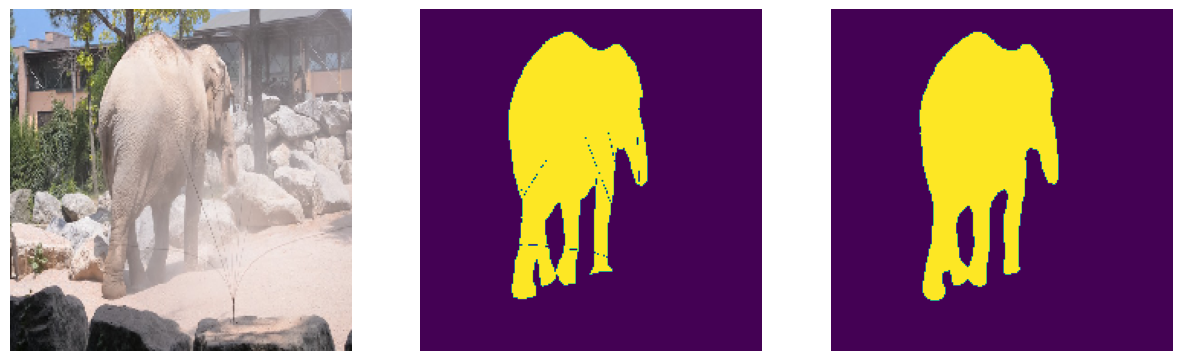

flamingo
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3307892978191376 0.9905133928571429


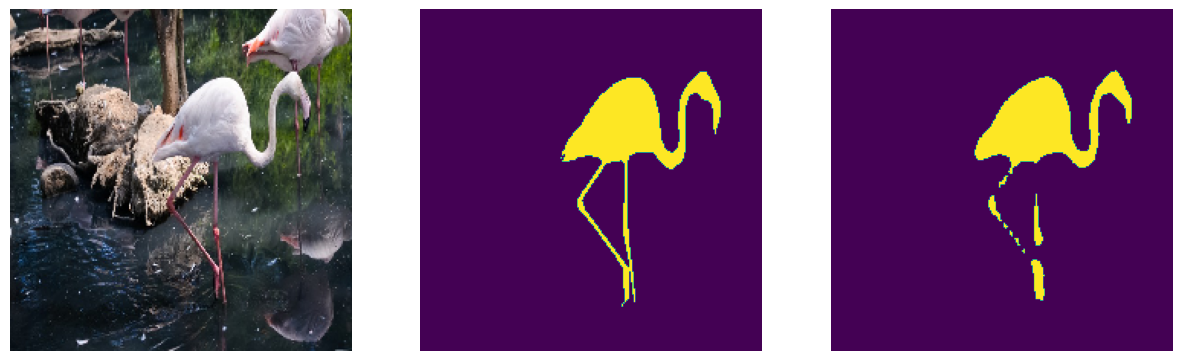

hike
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3281145989894867 0.9944595025510204


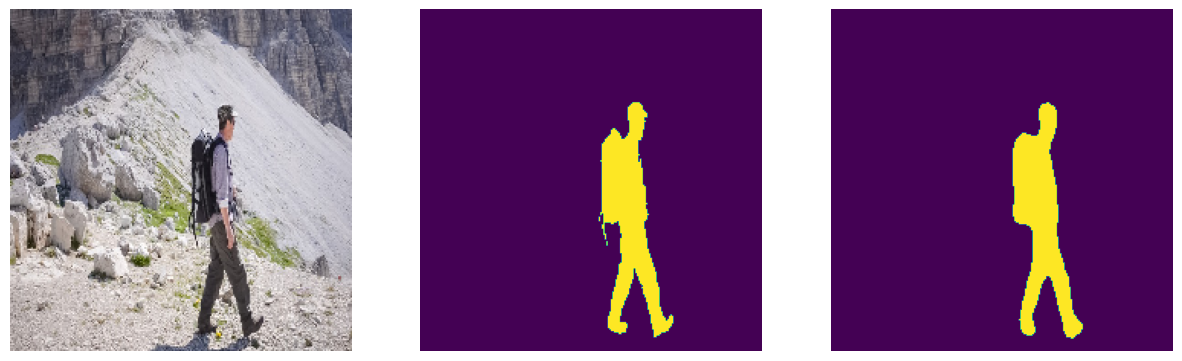

hockey
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
horsejump-low
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
kid-football
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
kite-walk
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
koala
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3255608081817627 0.9902144451530612


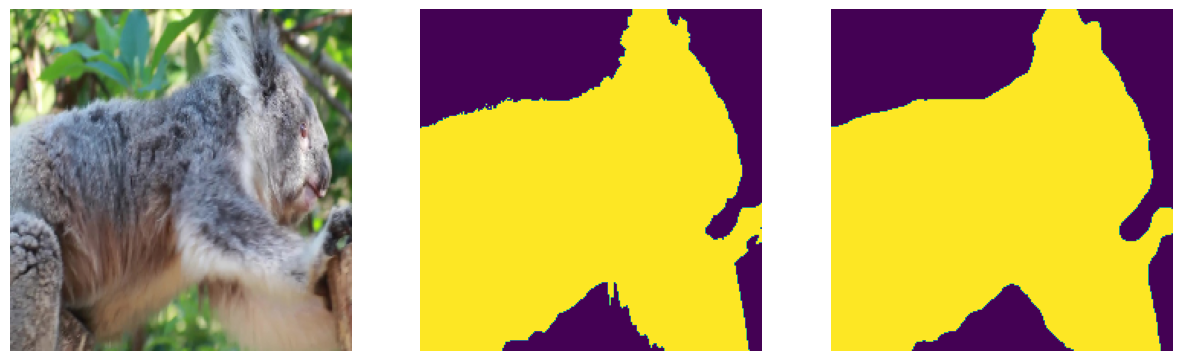

lady-running
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
lindy-hop
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 9
longboard
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 6
lucia
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32564398646354675 0.9934231505102041


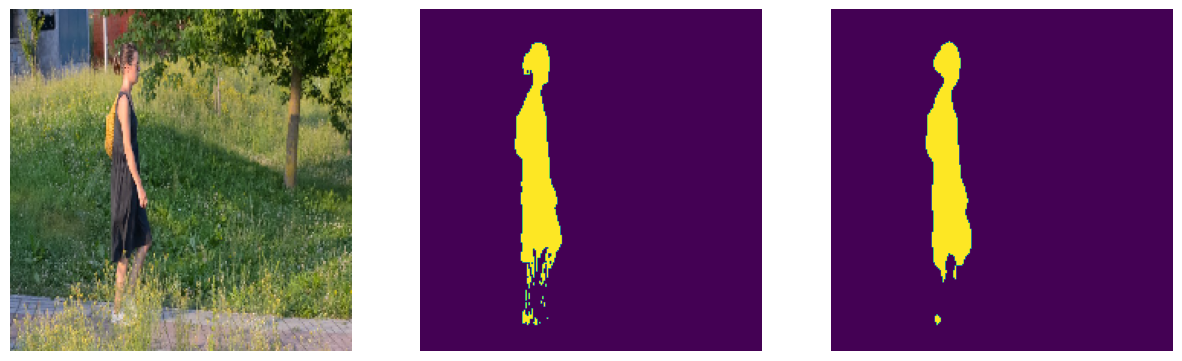

mallard-fly
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32274129986763 0.9967713647959183


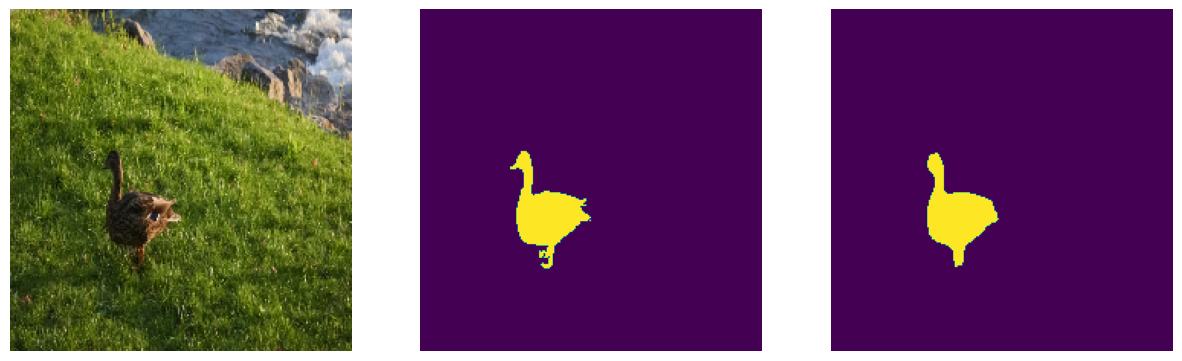

mallard-water
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3227333426475525 0.9955357142857143


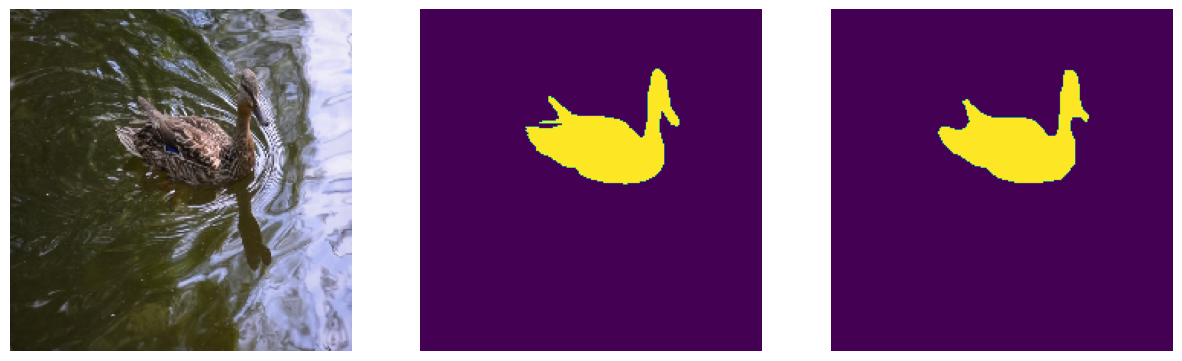

miami-surf
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 7
motocross-bumps
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
motorbike
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 4
night-race
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
paragliding
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
planes-water
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 3
rallye
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.32392236590385437 0.9995017538265306


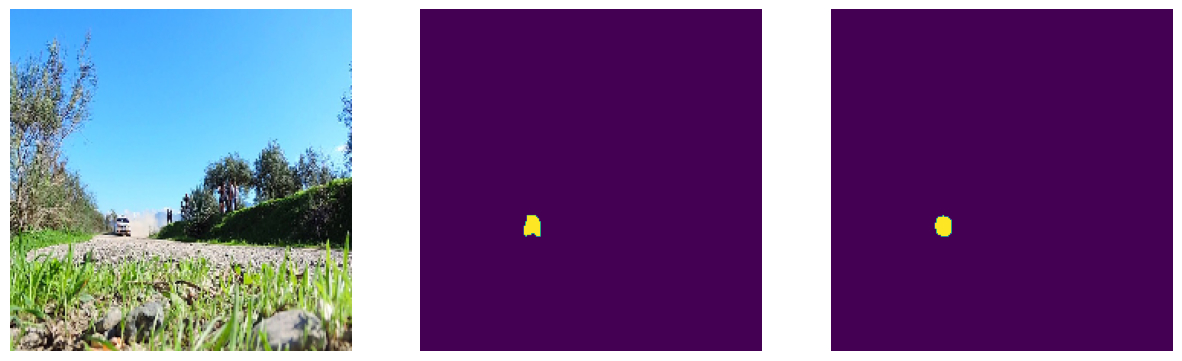

rhino
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2
0.3260084092617035 0.9910116390306123


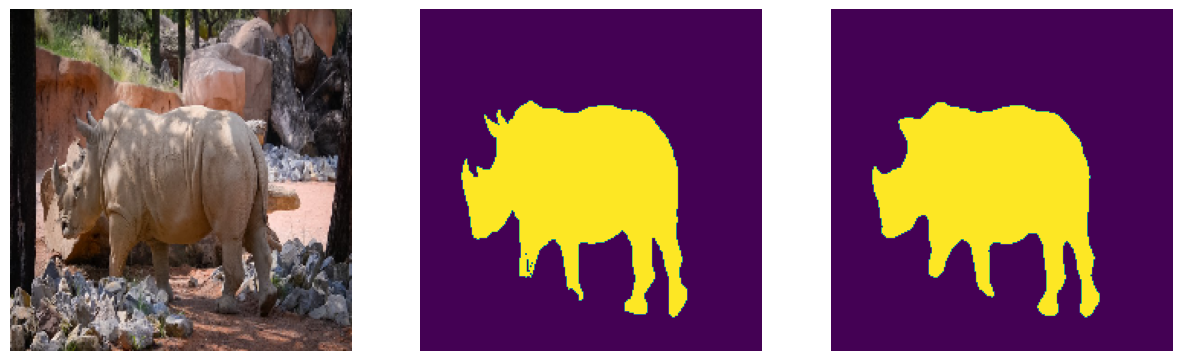

rollerblade
! (224, 224, 3)
(1, 224, 224, 3)
type_cnt: 2


KeyboardInterrupt: 

In [11]:
for i in range(len(train_list)):
    
    print(train_list[i])
    image_path = os.path.join(train_image_root, train_list[i] + '/00000.jpg')
    mask_path = os.path.join(train_mask_root, train_list[i] + '/00000.png')
    result_path = os.path.join(result_root, train_list[i])
    model_save_path = os.path.join(models_root, train_list[i] + '.pt')

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path)

    image = cv2.resize(image, resize, interpolation=cv2.INTER_NEAREST)
    mask = cv2.resize(mask, resize, interpolation=cv2.INTER_NEAREST)
    mask, color_to_gray_map, gray_to_color_map = convert_to_gray_mask(mask)
    print('type_cnt:', len(color_to_gray_map))
    
    if len(color_to_gray_map) > 2:
        continue

    val_dataset = CustomDataset(image_path, mask_path, image_transform=val_image_transforms, mask_transform=val_mask_transforms, num_samples=1)
    val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

    model = MyResNet(len(color_to_gray_map)).to(device)
    model.load_state_dict(torch.load(model_save_path))

    model.eval()
    for image, mask in val_dataloader:
        
        mask = (mask * 255).long()
        input = torch.cat((image, mask), dim=1).to(device)
        output_mask = torch.argmax(model(input), dim=1)
        output = model(input)
        loss = F.cross_entropy(output, input[:, 3, :, :].long())
        print(loss.item(), torch.sum(output_mask == torch.tensor(input[:, 3, :, :]).to(device)).item() / (224 * 224))
        
        mask_np = mask.squeeze(0).cpu().numpy().transpose(1, 2, 0)
        output_mask_np = output_mask.cpu().numpy().transpose(1, 2, 0)
        image_np = image.squeeze(0).numpy().transpose(1, 2, 0)
        print_images([image_np, mask_np, output_mask_np])
